In [1]:
import torch

In [2]:
import numpy as np

In [3]:
weight_file = "/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/OEM-Few-Shot-Learnable-Prompt/submission/8_test.pt"
adapter = torch.load(weight_file)

In [8]:
adapter.keys()

dict_keys(['model_state_dict'])

In [11]:
adapter['model_state_dict'].keys()

odict_keys(['image_tensor', 'mask_tensor'])

In [14]:
adapter['model_state_dict']['image_tensor'].shape

torch.Size([1, 3, 448, 448])

In [33]:
adapter_np = adapter['model_state_dict']['image_tensor'][0].permute(1, 2, 0)

In [34]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


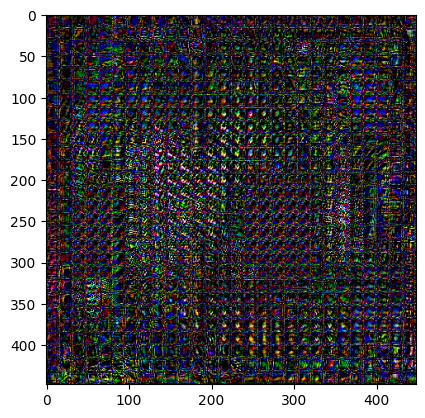

In [35]:
plt.imshow(adapter_np*5)

In [36]:
# Remove the batch dimension and reshape
reshaped_tensor = adapter_np.squeeze(0).reshape(3, -1)  # Now of shape (3, 200704)
print("Reshaped tensor for ICA:", reshaped_tensor.shape)

Reshaped tensor for ICA: torch.Size([3, 200704])


In [ ]:
# apply ICA 

from sklearn.decomposition import FastICA

# Initialize ICA with the number of components (equal to channels in this case)
ica = FastICA(n_components=3, random_state=0)

# Apply ICA to the reshaped tensor
independent_components = ica.fit_transform(reshaped_tensor.T).T  # Shape (3, 200704)
print("Independent Components Shape:", independent_components.shape)

Independent Components Shape: (3, 200704)


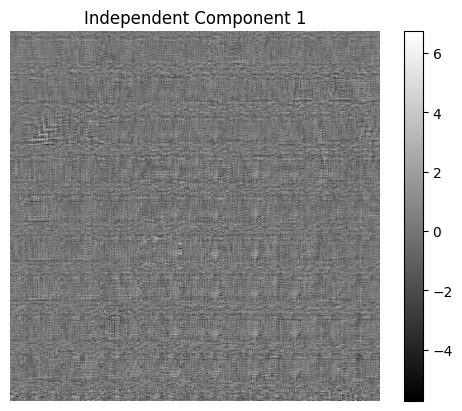

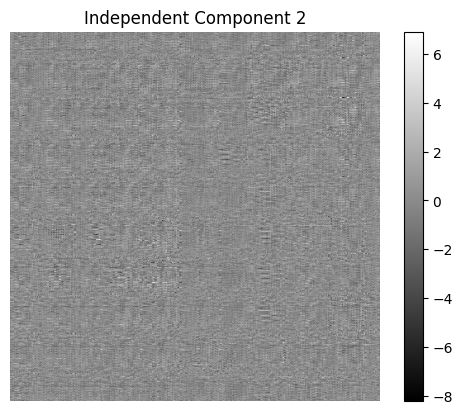

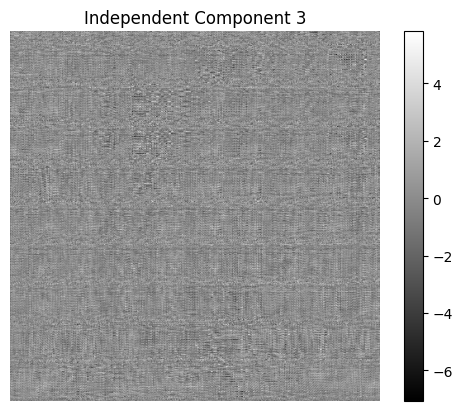

In [38]:
# Reshape each independent component to (448, 448) for visualization
for i, component in enumerate(independent_components):
    img = component.reshape(448, 448)
    plt.imshow(img, cmap='gray')
    plt.title(f"Independent Component {i+1}")
    plt.colorbar()
    plt.axis('off')
    plt.show()